## INSURANCE COMPANIES SETTLEMENT ANALYSIS BY MELU-AKEKUE BARINATAMKEE

### OBJECTIVE
* Perform Data Cleaning
* Perform Feature Engineering 
* Get the best ML Classifier for the sample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('sample.csv')
df.head()

,Claim No,Occurrence No,Claim Financial Year,Agency NN,Incident Date,Finalised Date,Total Paid,Paid Days Lost,Service Start Date,Service End Date,...,Mechanism,Nature,Major,Occupation,Gender,Date of Birth,Days to RTW,RTW Category,Age at Accident Date,Settled
0,13/005096,1,2013,7069,01-11-12,24-01-13,"$8,580.00",26.01,02-11-12,18-12-12,...,"Muscular stress-lift, carry, put down objects",Sprains and strains of joints and muscles,"Intermediate Clerical, Sales and Service Workers",Personal Care Assistant,Male,05-11-56,46,RTW 13 Weeks,55,N
1,21/013033,1,2021,63246,29-04-21,10-06-21,$573.66,2,29-04-21,30-04-21,...,Falls on the same level,Open wound not including traumatic amputation,"Intermediate Clerical, Sales and Service Workers",Teachers Aide (Education Assistant),Female,18-08-71,1,RTW 13 Weeks,49,N
2,16/005676,1,2016,2043954,16-11-15,04-01-16,$796.97,2.02,16-11-15,17-11-15,...,Being assaulted by a person or persons,Open wound not including traumatic amputation,Associate Professionals,Residential Care Officer,Male,07-07-67,1,RTW 13 Weeks,48,N
3,15/002879,1,2015,63246,04-09-14,18-02-15,"$5,570.19",26,05-09-14,10-10-14,...,Muscular stress with no objects handled,Sprains and strains of joints and muscles,"Intermediate Clerical, Sales and Service Workers",Teachers Aide (Education Assistant),Male,29-07-73,35,RTW 13 Weeks,41,N
4,14/020489,2,2014,63246,08-05-14,29-01-16,"$35,406.63",75.09,03-10-14,12-01-15,...,Falls on the same level,Sprains and strains of joints and muscles,Tradespersons and Related Workers,General Gardener,Male,06-02-51,101,RTW 26 Weeks,63,N


In [4]:
# Let's build a reference list of all columns and their indexes
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
col_mapping

['0:Claim No',
 '1:Occurrence No',
 '2:Claim Financial Year',
 '3:Agency NN',
 '4:Incident Date',
 '5:Finalised Date',
 '6:Total Paid',
 '7:Paid Days Lost',
 '8:Service Start Date',
 '9:Service End Date',
 '10:Injury Agency Group',
 '11:Bodily Location Group',
 '12:Mechanism Group',
 '13:Nature Group',
 '14:Bodily Location',
 '15:Mechanism',
 '16:Nature',
 '17:Major',
 '18:Occupation',
 '19:Gender',
 '20:Date of Birth',
 '21:Days to RTW',
 '22:RTW Category',
 '23:Age at Accident Date',
 '24:Settled']

In [5]:
df.dtypes

Claim No                 object
Occurrence No             int64
Claim Financial Year      int64
Agency NN                 int64
Incident Date            object
Finalised Date           object
Total Paid               object
Paid Days Lost           object
Service Start Date       object
Service End Date         object
Injury Agency Group      object
Bodily Location Group    object
Mechanism Group          object
Nature Group             object
Bodily Location          object
Mechanism                object
Nature                   object
Major                    object
Occupation               object
Gender                   object
Date of Birth            object
Days to RTW               int64
RTW Category             object
Age at Accident Date      int64
Settled                  object
dtype: object

In [6]:
df.isna().sum()

Claim No                   0
Occurrence No              0
Claim Financial Year       0
Agency NN                  0
Incident Date              0
Finalised Date             0
Total Paid                 0
Paid Days Lost             0
Service Start Date       475
Service End Date         475
Injury Agency Group        0
Bodily Location Group      0
Mechanism Group            0
Nature Group               0
Bodily Location            0
Mechanism                  0
Nature                     0
Major                      0
Occupation                 0
Gender                     0
Date of Birth              1
Days to RTW                0
RTW Category               0
Age at Accident Date       0
Settled                    0
dtype: int64

In [7]:
df[df['Date of Birth'].isna()]

,Claim No,Occurrence No,Claim Financial Year,Agency NN,Incident Date,Finalised Date,Total Paid,Paid Days Lost,Service Start Date,Service End Date,...,Mechanism,Nature,Major,Occupation,Gender,Date of Birth,Days to RTW,RTW Category,Age at Accident Date,Settled
12155,14/013142,1,2014,1801385,17-02-14,16-06-14,"$5,049.83",18.66,NaN,NaN,...,Muscular stress while handling object,Superficial injury,Professionals,Registered Nurse,Female,NaN,0,RTW 13 Weeks,114,N


In [8]:
# Subtract columns to get Duration of Incident and Duration of Service
import datetime as dt
x = pd.to_datetime(df['Finalised Date'], dayfirst=True) - pd.to_datetime(df['Incident Date'], dayfirst=True)
df['Duration of Service'] = pd.to_datetime(df['Service End Date'], dayfirst=True) - pd.to_datetime(df['Service Start Date'], dayfirst=True)
df['Duration of Incident'] = pd.to_datetime(df['Finalised Date'], dayfirst=True) - pd.to_datetime(df['Incident Date'], dayfirst=True)
df.head()

,Claim No,Occurrence No,Claim Financial Year,Agency NN,Incident Date,Finalised Date,Total Paid,Paid Days Lost,Service Start Date,Service End Date,...,Major,Occupation,Gender,Date of Birth,Days to RTW,RTW Category,Age at Accident Date,Settled,Duration of Service,Duration of Incident
0,13/005096,1,2013,7069,01-11-12,24-01-13,"$8,580.00",26.01,02-11-12,18-12-12,...,"Intermediate Clerical, Sales and Service Workers",Personal Care Assistant,Male,05-11-56,46,RTW 13 Weeks,55,N,46 days,84 days
1,21/013033,1,2021,63246,29-04-21,10-06-21,$573.66,2,29-04-21,30-04-21,...,"Intermediate Clerical, Sales and Service Workers",Teachers Aide (Education Assistant),Female,18-08-71,1,RTW 13 Weeks,49,N,1 days,42 days
2,16/005676,1,2016,2043954,16-11-15,04-01-16,$796.97,2.02,16-11-15,17-11-15,...,Associate Professionals,Residential Care Officer,Male,07-07-67,1,RTW 13 Weeks,48,N,1 days,49 days
3,15/002879,1,2015,63246,04-09-14,18-02-15,"$5,570.19",26,05-09-14,10-10-14,...,"Intermediate Clerical, Sales and Service Workers",Teachers Aide (Education Assistant),Male,29-07-73,35,RTW 13 Weeks,41,N,35 days,167 days
4,14/020489,2,2014,63246,08-05-14,29-01-16,"$35,406.63",75.09,03-10-14,12-01-15,...,Tradespersons and Related Workers,General Gardener,Male,06-02-51,101,RTW 26 Weeks,63,N,101 days,631 days


In [9]:
# Let's remove columns Claim No, Incident Date, Finalised Date, Service Start Date and Service End Date
# df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)
df_filtered = df.drop(['Claim No', 'Incident Date', 'Finalised Date', 'Service Start Date', 'Service End Date'], axis=1)
df_filtered.head()

,Occurrence No,Claim Financial Year,Agency NN,Total Paid,Paid Days Lost,Injury Agency Group,Bodily Location Group,Mechanism Group,Nature Group,Bodily Location,...,Major,Occupation,Gender,Date of Birth,Days to RTW,RTW Category,Age at Accident Date,Settled,Duration of Service,Duration of Incident
0,1,2013,7069,"$8,580.00",26.01,Mobile Plant and Transport,Trunk (inc. Back),Body Stressing,"Sprains, Strains and Dislocations",Stomach,...,"Intermediate Clerical, Sales and Service Workers",Personal Care Assistant,Male,05-11-56,46,RTW 13 Weeks,55,N,46 days,84 days
1,1,2021,63246,$573.66,2,"Non-powered Handtools, Appliances and Equipment",Head,"Falls, Slips and Trips of a Person",Open Wound,Head - unspecified locations,...,"Intermediate Clerical, Sales and Service Workers",Teachers Aide (Education Assistant),Female,18-08-71,1,RTW 13 Weeks,49,N,1 days,42 days
2,1,2016,2043954,$796.97,2.02,"Animal, Human and Biological Agencies",Head,Being Hit by Moving Objects,Open Wound,Face,...,Associate Professionals,Residential Care Officer,Male,07-07-67,1,RTW 13 Weeks,48,N,1 days,49 days
3,1,2015,63246,"$5,570.19",26,"Animal, Human and Biological Agencies",Lower Limbs,Body Stressing,"Sprains, Strains and Dislocations",Knee,...,"Intermediate Clerical, Sales and Service Workers",Teachers Aide (Education Assistant),Male,29-07-73,35,RTW 13 Weeks,41,N,35 days,167 days
4,2,2014,63246,"$35,406.63",75.09,Environmental Agencies,Upper Limbs,"Falls, Slips and Trips of a Person","Sprains, Strains and Dislocations",Shoulder,...,Tradespersons and Related Workers,General Gardener,Male,06-02-51,101,RTW 26 Weeks,63,N,101 days,631 days


In [10]:
print(df_filtered.columns)

Index(['Occurrence No', 'Claim Financial Year', 'Agency NN', 'Total Paid',
       'Paid Days Lost', 'Injury Agency Group', 'Bodily Location Group',
       'Mechanism Group', 'Nature Group', 'Bodily Location', 'Mechanism',
       'Nature', 'Major', 'Occupation', 'Gender', 'Date of Birth',
       'Days to RTW', 'RTW Category', 'Age at Accident Date', 'Settled',
       'Duration of Service', 'Duration of Incident'],
      dtype='object')


In [11]:
# Observing the value counts for each column
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object':
        print(df_filtered[col].value_counts())

$0.00          62
$645.50         4
$961.41         3
$966.92         3
$295.44         3
               ..
$13,712.79      1
$99,596.72      1
$5,182.77       1
$273.59         1
$1,074.67       1
Name: Total Paid, Length: 22941, dtype: int64
1         1140
2         1101
3          773
4          573
5          492
          ... 
318.83       1
600.47       1
75.56        1
264          1
429.06       1
Name: Paid Days Lost, Length: 7392, dtype: int64
Animal, Human and Biological Agencies              7098
Non-powered Handtools, Appliances and Equipment    5988
Environmental Agencies                             3789
Other and Unspecified Agencies                     2405
Mobile Plant and Transport                         1174
Materials and Substances                           1143
Powered Equipment, Tools and Appliances            1034
Machinery and (Mainly) Fixed Plant                  321
Chemicals and Chemical Products                     187
Name: Injury Agency Group, dtype: int6

In [12]:
df_filtered['Gender'].value_counts()

Female      14492
Male         8646
Unknown         1
Name: Gender, dtype: int64

In [13]:
# Let's move Settled to the last column
column_to_move = df_filtered.pop("Settled")
df_filtered.insert(21, "Settled", column_to_move)
df_filtered.head(1)

,Occurrence No,Claim Financial Year,Agency NN,Total Paid,Paid Days Lost,Injury Agency Group,Bodily Location Group,Mechanism Group,Nature Group,Bodily Location,...,Major,Occupation,Gender,Date of Birth,Days to RTW,RTW Category,Age at Accident Date,Duration of Service,Duration of Incident,Settled
0,1,2013,7069,"$8,580.00",26.01,Mobile Plant and Transport,Trunk (inc. Back),Body Stressing,"Sprains, Strains and Dislocations",Stomach,...,"Intermediate Clerical, Sales and Service Workers",Personal Care Assistant,Male,05-11-56,46,RTW 13 Weeks,55,46 days,84 days,N


### Making use of Bar Charts and Box plots to see the correlation between the columns and the Settled column

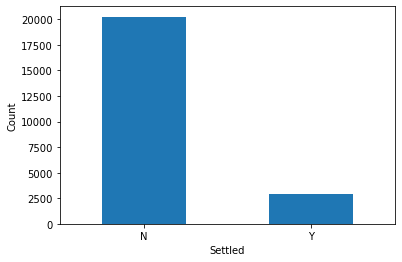

In [14]:
df_filtered['Settled'].value_counts().plot(kind='bar', xlabel='Settled', ylabel='Count', rot=0)
plt.show()

### Using Chi-Squared Test to pick the best features to use 

In [15]:
# # split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# # summarize
# print('Train', X_train.shape, y_train.shape)
# print('Test', X_test.shape, y_test.shape)

# Retrieve numpy array
dataset = df_filtered.values
# Split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]
# format all fields as string
X = X.astype(str)
print(X, y)

[['1' '2013' '7069' ... '55' '46 days 00:00:00' '84 days 00:00:00']
 ['1' '2021' '63246' ... '49' '1 days 00:00:00' '42 days 00:00:00']
 ['1' '2016' '2043954' ... '48' '1 days 00:00:00' '49 days 00:00:00']
 ...
 ['1' '2019' '2623845' ... '49' '3 days 00:00:00' '49 days 00:00:00']
 ['1' '2013' '2253554' ... '57' '2 days 00:00:00' '344 days 00:00:00']
 ['1' '2022' '2623920' ... '53' '298 days 00:00:00' '389 days 00:00:00']] ['N' 'N' 'N' ... 'N' 'N' 'Y']


In [16]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets, using 67% of data for training and 33% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (15503, 21) (15503,)
Test (7636, 21) (7636,)


### Prepare the Input data

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)
print(X_train_enc, X_test_enc)

[[2.000e+00 1.000e+00 1.080e+02 ... 2.000e+01 3.340e+02 7.270e+02]
 [2.000e+00 1.000e+00 1.080e+02 ... 3.900e+01 8.110e+02 6.200e+01]
 [3.000e+00 1.000e+00 2.000e+01 ... 2.300e+01 9.200e+01 7.310e+02]
 ...
 [0.000e+00 8.000e+00 1.080e+02 ... 4.400e+01 7.950e+02 1.534e+03]
 [0.000e+00 6.000e+00 8.400e+01 ... 4.200e+01 9.390e+02 1.659e+03]
 [0.000e+00 5.000e+00 1.080e+02 ... 3.800e+01 7.740e+02 1.070e+02]] [[   0.    0.   56. ...   30.  587.  188.]
 [   0.    0.  108. ...   40.  334.  667.]
 [   0.    6.  108. ...   25.  795.  596.]
 ...
 [   0.    7.  108. ...   51. 1103.  991.]
 [   0.    3.   20. ...   40.  674. 1677.]
 [   0.    9.   83. ...   45. 1094.  314.]]


### Prepare the Output data

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
print(y_train_enc, y_test_enc)

[0 1 0 ... 0 1 1] [0 0 0 ... 0 0 0]


### Now that we have loaded and prepared the dataset, we can explore feature selection.

### Chi-Squared Feature Selection
#### Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

#### We can then print the scores for each variable (largest is better), and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

Feature 0: 1494.877961
Feature 1: 140.987184
Feature 2: 149.032149
Feature 3: 30019.821978
Feature 4: 75622.256117
Feature 5: 1.231208
Feature 6: 18.164627
Feature 7: 282.887569
Feature 8: 0.213988
Feature 9: 1480.395651
Feature 10: 251.080662
Feature 11: 22.389234
Feature 12: 1.681745
Feature 13: 1403.654780
Feature 14: 7.614364
Feature 15: 2292.660728
Feature 16: 94588.371797
Feature 17: 982.976218
Feature 18: 537.350621
Feature 19: 72113.337707
Feature 20: 19245.663535


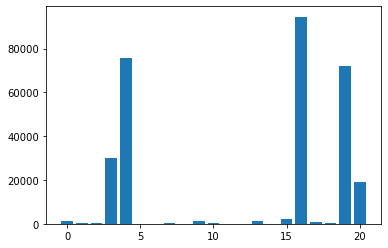

In [20]:
# Get the scores for each feature
import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [21]:
len(df_filtered.columns)

22

In [22]:
# Print the scores with the name of the respective feature
feature_scores = {}
for (score,feature) in zip(fs.scores_, df_filtered.columns):
    #print("Feature: ", feature ,"; Score: ", score)
    feature_scores[feature] = []
    feature_scores[feature].append(score)
print(feature_scores)

{'Occurrence No': [1494.877960704207], 'Claim Financial Year': [140.98718449221423], 'Agency NN': [149.03214924108906], 'Total Paid': [30019.82197784309], 'Paid Days Lost': [75622.25611730787], 'Injury Agency Group': [1.2312075049117401], 'Bodily Location Group': [18.16462735010077], 'Mechanism Group': [282.88756947524524], 'Nature Group': [0.2139880489614825], 'Bodily Location': [1480.3956511522208], 'Mechanism': [251.08066249432255], 'Nature': [22.389234004571243], 'Major': [1.6817454089103652], 'Occupation': [1403.6547798058482], 'Gender': [7.614363904368194], 'Date of Birth': [2292.6607275935044], 'Days to RTW': [94588.37179683124], 'RTW Category': [982.9762176274314], 'Age at Accident Date': [537.3506210862328], 'Duration of Service': [72113.33770704552], 'Duration of Incident': [19245.66353498628]}


#### From our Chi Square, there are 5 major features, so let's pick the top 5 features from the feature score dictionary

In [23]:
# To get the top 5 features
from heapq import nlargest
top_5_features = nlargest(5, feature_scores, key = feature_scores.get)
print(top_5_features)

['Days to RTW', 'Paid Days Lost', 'Duration of Service', 'Total Paid', 'Duration of Incident']


#### The null hypothesis for chi2 test is that "two categorical variables are independent". So a higher value of chi2 statistic means "two categorical variables are dependent" and MORE USEFUL for classification.

In [24]:
# We edit the chi square feature selection to pick the top 5 values(Days to RTW, Paid Days Lost, Duration of Service, Total Paid, Duration of Incident)
fs = SelectKBest(score_func=chi2, k=5)
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

# Print the features and scores 
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 1494.877961
Feature 1: 140.987184
Feature 2: 149.032149
Feature 3: 30019.821978
Feature 4: 75622.256117
Feature 5: 1.231208
Feature 6: 18.164627
Feature 7: 282.887569
Feature 8: 0.213988
Feature 9: 1480.395651
Feature 10: 251.080662
Feature 11: 22.389234
Feature 12: 1.681745
Feature 13: 1403.654780
Feature 14: 7.614364
Feature 15: 2292.660728
Feature 16: 94588.371797
Feature 17: 982.976218
Feature 18: 537.350621
Feature 19: 72113.337707
Feature 20: 19245.663535


In [25]:
print(X_train_fs)

[[12827.  2673.   334.   334.   727.]
 [11799.  3987.   811.   811.    62.]
 [ 9079.  3248.    92.    92.   731.]
 ...
 [  661.  3385.   795.   795.  1534.]
 [ 6285.  3980.   939.   939.  1659.]
 [ 8610.  3567.   774.   774.   107.]]


#### Now Let's use the features gotten from Chi Square and fit the model.
##### The following Classification models will be used
* Logistic Regression
* Support Vector Machines
* Decision Tree
* KNN

### Logistic Regression Model

In [26]:
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Function for plotting CONFUSION MATRIX
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax=plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Not settled', 'Settled']); ax.yaxis.set_ticklabels(['Not settled', 'Settled'])

Logistic Regression accuracy is  0.8791251964379256


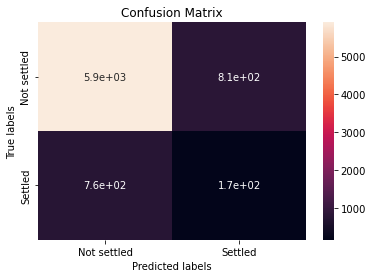

In [29]:
lr=LogisticRegression()

# Train the model
lr.fit(X_train_fs, y_train_enc)

# Get the accuracy score of the model
lr_score = lr.score(X_test_fs, y_test_enc)
print("Logistic Regression accuracy is ", lr_score)

# Plot the confusion matrix
yhat=lr.predict(X_test_fs)
threshold = 0.2
lr_yhat= (lr.predict_proba(X_test_fs)[:,1] >= threshold).astype(bool) 
plot_confusion_matrix(y_test_enc,lr_yhat)

In [30]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

print('Scoring based on tuned threshold')
print('-'*50)
print(f'Accuracy score:          {accuracy_score(y_test_enc, lr_yhat > threshold)}')
print(f'Balanced accuracy score: {balanced_accuracy_score(y_test_enc, lr_yhat > threshold)}')
print(f'F1 score:                {f1_score(y_test_enc, lr_yhat > threshold)}')
print('-'*50)

Scoring based on tuned threshold
--------------------------------------------------
Accuracy score:          0.7949188056574122
Balanced accuracy score: 0.5301351705322979
F1 score:                0.17578947368421052
--------------------------------------------------


#### ROC FOR LOGISTIC REGRESSION MODEL

LR: ROC AUC=0.586


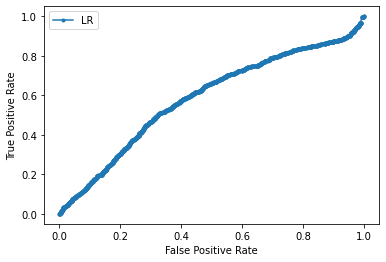

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# predict the probability
lr_probs = lr.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test_enc, lr_probs)
# summarize scores
print('LR: ROC AUC=%.3f' % (lr_auc))
# calculate roc scores
lr_fpr, lr_tpr, thresholds = roc_curve(y_test_enc, lr_probs)
# plot the curve
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### SVM Model

SVM accuracy is  0.8791251964379256


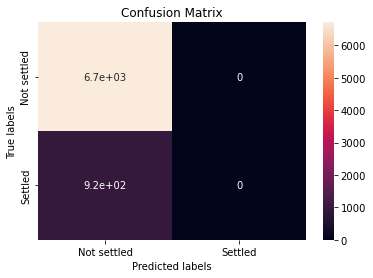

In [32]:
svm = SVC()

# Train the model
svm.fit(X_train_fs, y_train_enc)

# Get the accuracy score of the model
svm_score = svm.score(X_test_fs, y_test_enc)
print('SVM accuracy is ', svm_score)

# Plot the confusion matrix
svm_yhat=svm.predict(X_test_fs)
plot_confusion_matrix(y_test_enc,svm_yhat)

#### ROC CURVE FOR SVM MODEL

### Decision Tree Model

Decision Tree accuracy is  0.8791251964379256


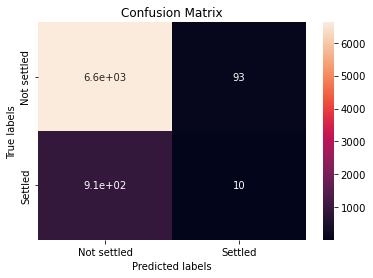

In [33]:
tree=DecisionTreeClassifier()

# Train the model
tree.fit(X_train_fs, y_train_enc)

# Get the accuracy score of the model
tree_score = lr.score(X_test_fs, y_test_enc)
print("Decision Tree accuracy is ", tree_score)

# Plot the confusion matrix
threshold = 0.2
tree_yhat= (tree.predict_proba(X_test_fs)[:,1] >= threshold).astype(bool) 
#tree_yhat=lr.predict(X_test_fs)
plot_confusion_matrix(y_test_enc,tree_yhat)

In [34]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

print('Scoring based on tuned threshold')
print('-'*50)
print(f'Accuracy score:          {accuracy_score(y_test_enc, tree_yhat > threshold)}')
print(f'Balanced accuracy score: {balanced_accuracy_score(y_test_enc, tree_yhat > threshold)}')
print(f'F1 score:                {f1_score(y_test_enc, tree_yhat > threshold)}')
print('-'*50)

Scoring based on tuned threshold
--------------------------------------------------
Accuracy score:          0.8682556312205343
Balanced accuracy score: 0.49849025975859973
F1 score:                0.01949317738791423
--------------------------------------------------


#### ROC CURVE FOR TREE MODEL

Tree: ROC AUC=0.498


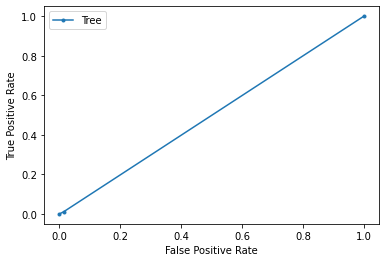

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# predict the probability
tree_probs = tree.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
tree_probs = tree_probs[:, 1]
# calculate scores
tree_auc = roc_auc_score(y_test_enc, tree_probs)
# summarize scores
print('Tree: ROC AUC=%.3f' % (tree_auc))
# calculate roc scores
tree_fpr, tree_tpr, thresholds = roc_curve(y_test_enc, tree_probs)
# plot the curve
plt.plot(tree_fpr, tree_tpr, marker='.', label='Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### KNN Model

KNN accuracy is  0.8791251964379256


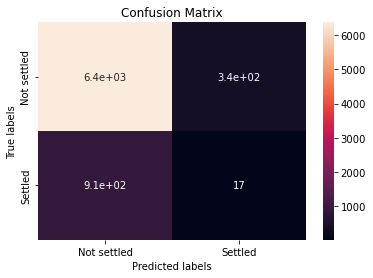

In [36]:
KNN=KNeighborsClassifier()

# Train the model
KNN.fit(X_train_fs, y_train_enc)

# Get the accuracy score of the model
KNN_score = KNN.score(X_test_fs, y_test_enc)
print("KNN accuracy is ", KNN_score)

# Plot the confusion matrix
threshold = 0.2
KNN_yhat= (KNN.predict_proba(X_test_fs)[:,1] >= threshold).astype(bool) 
# KNN_yhat= (KNN.predict_proba(X_test_fs)[:,1] >= 0.2).astype(bool) 
plot_confusion_matrix(y_test_enc,KNN_yhat)

In [37]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

print('Scoring based on tuned threshold')
print('-'*50)
print(f'Accuracy score:          {accuracy_score(y_test_enc, KNN_yhat > threshold)}')
print(f'Balanced accuracy score: {balanced_accuracy_score(y_test_enc, KNN_yhat > threshold)}')
print(f'F1 score:                {f1_score(y_test_enc, KNN_yhat > threshold)}')
print('-'*50)

Scoring based on tuned threshold
--------------------------------------------------
Accuracy score:          0.8366946045049765
Balanced accuracy score: 0.4838106201982893
F1 score:                0.026541764246682278
--------------------------------------------------


#### ROC CURVE FOR KNN MODEL

KNN: ROC AUC=0.484


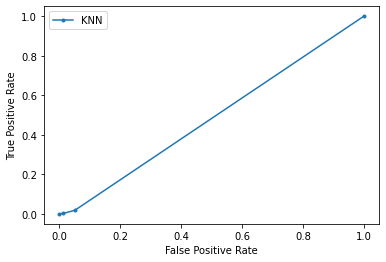

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# predict the probability
KNN_probs = KNN.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
# calculate scores
KNN_auc = roc_auc_score(y_test_enc, KNN_probs)
# summarize scores
print('KNN: ROC AUC=%.3f' % (KNN_auc))
# calculate roc scores
KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test_enc, KNN_probs)
# plot the curve
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### So the model with the best performance is the Logistic Regression Model

In [52]:
accuracy = accuracy_score(y_test_enc, lr_yhat)
print(f'Accuracy of Logistic Regression Model: {(accuracy*100)}%')

Accuracy of Logistic Regression Model: 79.49188056574123%
